# MUSK & NON-MUSK CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
df = pd.read_csv("musk_csv.csv")
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
df.shape

(6598, 170)

In [4]:
#df.duplicated().count

In [5]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [6]:
df["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [7]:
df = df.drop(columns=["ID","molecule_name","conformation_name"])
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [8]:
#df.sample(frac=1)

In [9]:
#X = df.drop("class",1)
#y = df["class"]

X = df.iloc[:,0:166]
y = df.iloc[:,166]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# NEURAL NETWORK

In [11]:
model = Sequential()
model.add(Dense(128,input_dim = 166,activation ="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation ="relu"))
model.add(Dropout(.2))
model.add(Dense(1,activation = "sigmoid"))

In [12]:
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics=["accuracy"])

In [13]:
history= model.fit(x_train,y_train,epochs = 100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
165/165 [==============================] - 0s 2ms/step - loss: 4.3391 - accuracy: 0.8331 - val_loss: 0.3991 - val_accuracy: 0.9091
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8990 - val_loss: 0.2610 - val_accuracy: 0.9318
Epoch 3/100
165/165 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9282 - val_loss: 0.1540 - val_accuracy: 0.9371
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9392 - val_loss: 0.2055 - val_accuracy: 0.9553
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9445 - val_loss: 0.1147 - val_accuracy: 0.9523
Epoch 6/100
165/165 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9536 - val_loss: 0.1134 - val_accuracy: 0.9576
Epoch 7/100
165/165 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9572 - val_loss: 0.1115 - val_accuracy: 0.9576

Epoch 58/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0175 - val_accuracy: 0.9917
Epoch 59/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0065 - val_accuracy: 0.9970
Epoch 60/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0109 - val_accuracy: 0.9955
Epoch 61/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0274 - val_accuracy: 0.9856
Epoch 62/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0909 - val_accuracy: 0.9644
Epoch 63/100
165/165 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9729 - val_loss: 0.0458 - val_accuracy: 0.9886
Epoch 64/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.0401 - val_accuracy:

In [14]:
history1= history.history

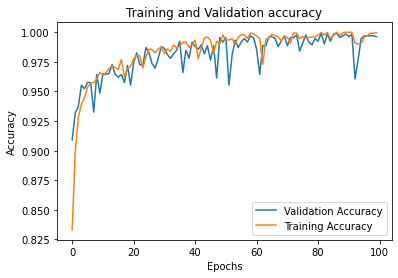

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history1["val_accuracy"],label="Validation Accuracy")
plt.plot(history1["accuracy"],label="Training Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

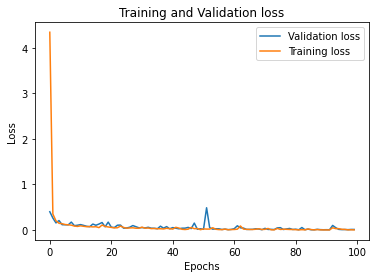

In [16]:
plt.plot(history1["val_loss"],label="Validation loss")
plt.plot(history1["loss"],label="Training loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(x_train,y_train)

165/165 [==============================] - 0s 714us/step - loss: 0.0023 - accuracy: 0.9994


[0.002326218644157052, 0.9994316101074219]

In [18]:
score = model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.010287456214427948, 0.9962121248245239]


In [19]:
print("f1_score:",f1_score(y_test,model.predict_classes(x_test),))
print("precision",precision_score(y_test,model.predict_classes(x_test),))
print("recall:",recall_score(y_test,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
f1_score: 0.9875930521091811
precision 0.995
recall: 0.9802955665024631
Validation Loss: 0.010287456214427948
Validation Accuracy: 0.9962121248245239


In [20]:
#model.save("musk classification")
model.save('Musk_Class.h5')